In [2]:
using LinearAlgebra
using SparseArrays
using Plots
using Kronecker
using Arpack 

In [50]:
#= Physic constant define :
    - ħ stands for reduced Planck constant
    - k stands for force constant
    - m stands for mass of the particle
=#

ħ = 1
k = 1
m = 1
ω = sqrt(k/m)

#= Consts define :
    - n   number of division
    - x⁻  left boundary of position
    - x⁺  right boundary of position
    - Δx  step size of position  
=#

n = 120
s⁺ = 1
s⁻ = -1

Δs = (s⁺-s⁻)/(n)


#===================================================
Mathematic model pre-defines for harmonic oscillator
===================================================#

#= 2-D Potential energy ∨(r)
    - r : coordinates input, support vector input 
    
    Return the potential energy of an harmonic oscillator
    
    Example:
    for input x it gives return ∨(x)
    for vector x⃗ it gives return [∨(x₁),∨(x₂),...,∨(xₙ)]
=#
function ∨(r)
    return vec([1/2*k*(x[1]^2+x[2]^2) for x in r])
end



#===========================================
 Pre-defines for solveing numercial solution
============================================#

#=
Spetial descritized coordinate matrix S 
=#

S =  [(s⁻+j*Δs,s⁻+i*Δs) for i in 1:n, j in 1:n]

#=
Spetial descritized coordinate vector s
=#

S⃗ =  reshape(S,n*n,1)

#= Secound derivative matrix D²
    - n : number of division
    - Δx : step size of position
    - D² : secound derivative matrix
=#
D² = diagm(0=>-2*ones(n),1=>ones(n-1),-1=>ones(n-1))

#= 
Potential operator (equivelent matrix)∨̂
=#

∨̂ = diagm(0=>∨(S⃗))


p̂² = (-ħ/2m) * D²⊕D² 

#= Hamiltonian  operator Ĥ
    Hamiltonian operator will be the sum of kinetic energy & potential energy
    - Ĥ = p̂²/2m + ∨̂
=#

Ĥ = sparse(p̂² + ∨̂)


# Find Eigenvalues and eigenvectors for Ĥ
E,ψ = eigs(Ĥ, nev=10, which=:SM)



┌ Error: XYAUPD_Exception: Maximum number of iterations taken. All possible eigenvalues of OP has been found.
│ IPARAM(5) returns the number of wanted converged Ritz values.
│   info = 1
└ @ Arpack C:\Users\nightlan1015297\.julia\packages\Arpack\FCvNd\src\libarpack.jl:47


Arpack.XYAUPD_Exception: 

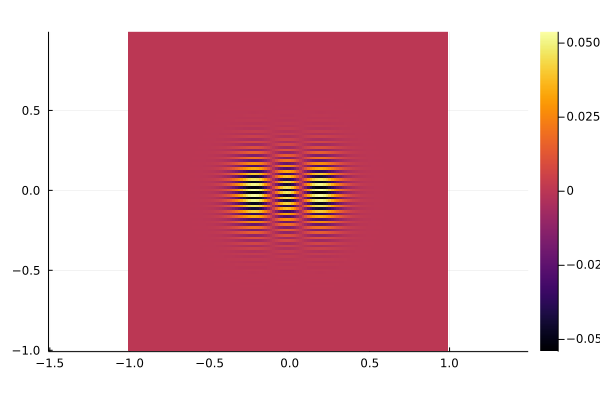

In [45]:
x = collect(s⁻:Δs:s⁺-Δs)
y = collect(s⁻:Δs:s⁺-Δs)
heatmap(x, y, reshape(ψ[:,4],120,120),aspect_ratio = :equal )